In [9]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
with open('data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [5]:
import numpy as np

In [11]:
def svc_param_selection(x, y, nfolds):
    # 1. C : 비용 (cost), 결정경계선의 마진을 결정하는 파라미터입니다.
    # 2. gamma: 커널의 데이터포인트의 표준편차를 결정하는 파라미터입니다.
    # 결과적으로 C가 클수록, 결정경계선과 서포트 벡터의 간격(마진)이 작아집니다.  
    # 결과적으로 gamma가 클수록, 결정경계선이 데이터포인트와 더욱 가까워집니다.
    svm_parameters = [
        {'kernel' : ['rbf'],
         'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
         'C' : [0.01, 0.1, 1, 10, 100, 1000]
        }
    ]
    clf = GridSearchCV(SVC(), svm_parameters, cv = 10)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)
    return clf

In [12]:
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

In [13]:
clf = svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [14]:
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

In [16]:
gamma_canditates = []
gamma_canditates.append(clf.best_params_['gamma'] * 0.01)
gamma_canditates.append(clf.best_params_['gamma'])
gamma_canditates.append(clf.best_params_['gamma'] * 100)

In [18]:
x_ = train[['3P', 'BLK']]
y_ = train['Pos'].tolist()

In [21]:
position = []
for gt in y_:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

In [22]:
classifiers = []

In [23]:
for C in C_canditates:
    for gamma in gamma_canditates:
        clf = SVC(C= C, gamma= gamma)
        clf.fit(x_, y_)
        classifiers.append((C, gamma, clf))

In [49]:
plt.style.use('default')

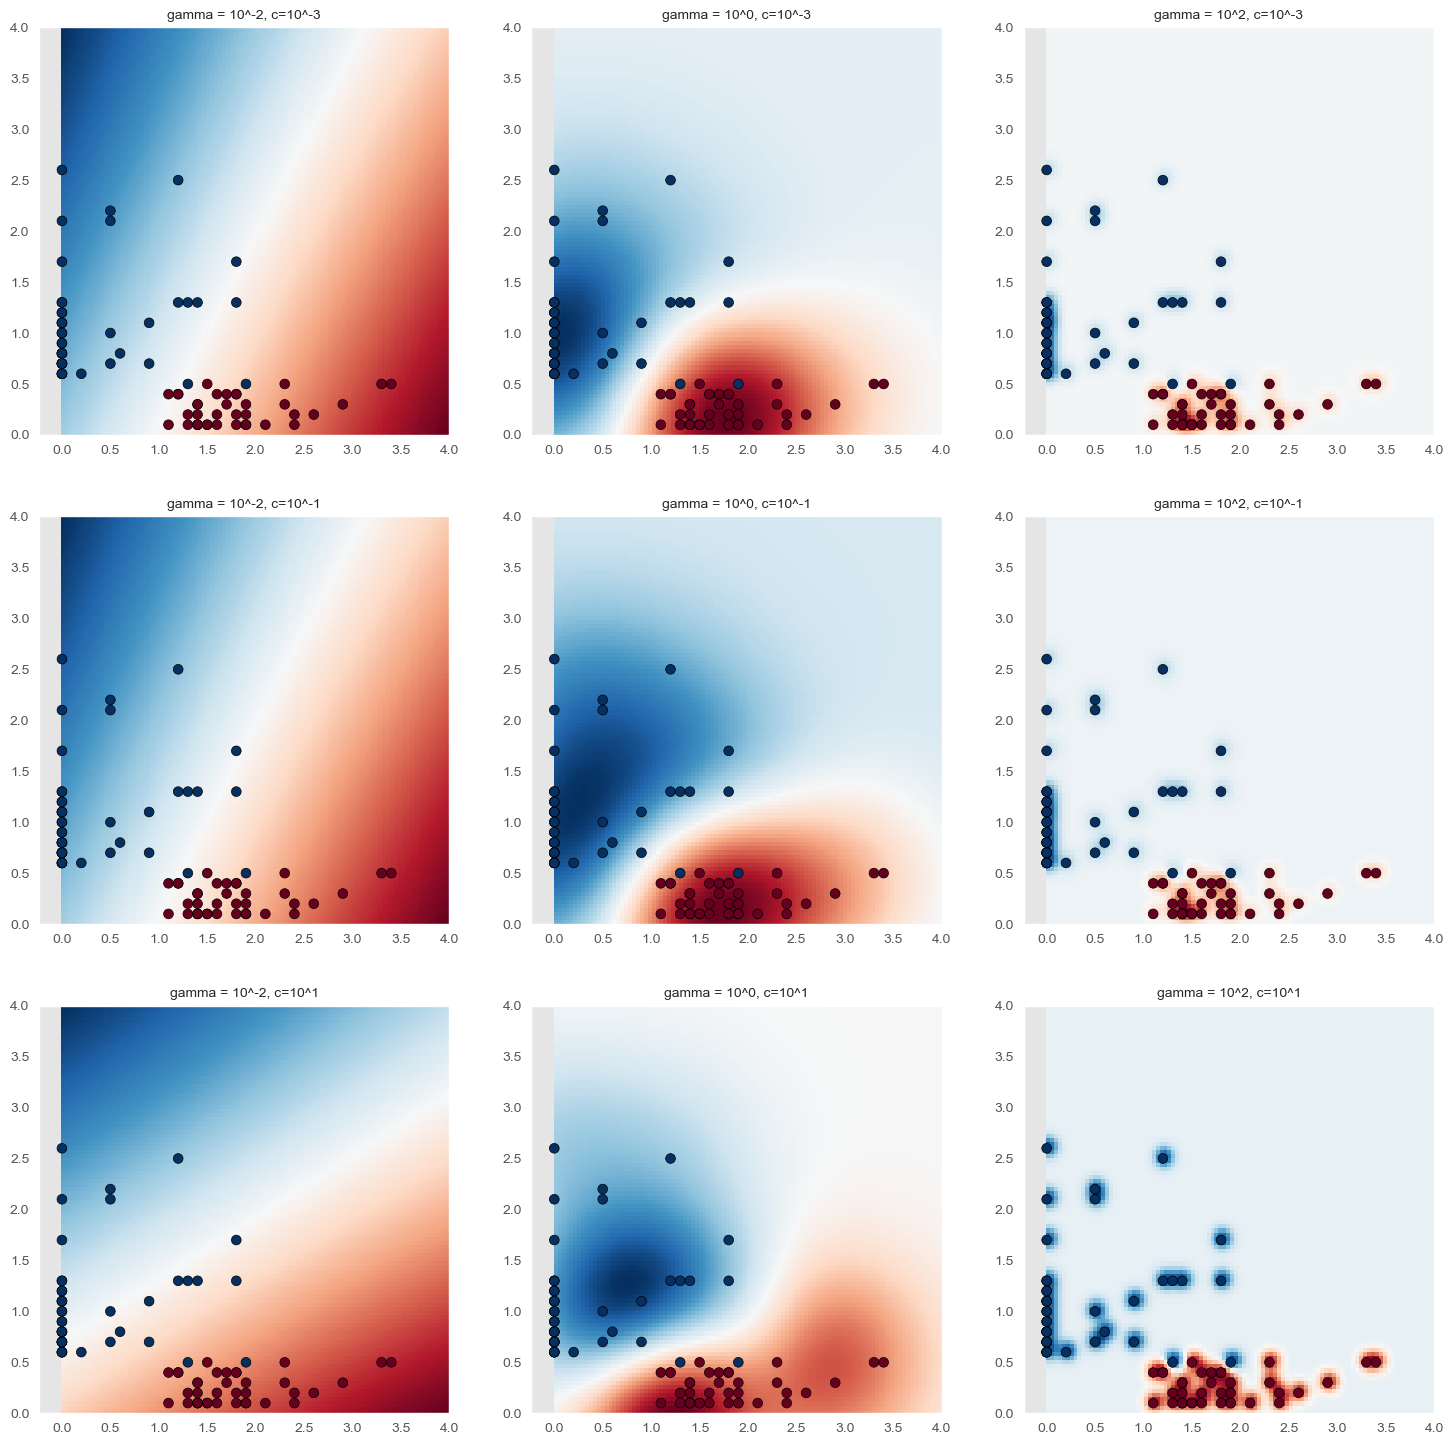

In [48]:
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_canditates), k + 1)
    plt.title('gamma = 10^%d, c=10^%d' % (np.log10(gamma), np.log10(C)), size = 'medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap= plt.cm.RdBu)
    plt.scatter(x_['3P'], x_['BLK'], c= position, cmap= plt.cm.RdBu_r, edgecolors='k')

In [50]:
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

In [51]:
y_true, y_pred = y_test, clf.predict(x_test)

In [53]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           C       0.67      0.86      0.75         7
          SG       0.91      0.77      0.83        13

    accuracy                           0.80        20
   macro avg       0.79      0.81      0.79        20
weighted avg       0.82      0.80      0.80        20



In [54]:
print('accuracy : ' + str(accuracy_score(y_true, y_pred)))

accuracy : 0.8


In [55]:
comparison = pd.DataFrame({
    'prediction' : y_pred,
    'ground_truth' : y_true.values.ravel()})
comparison

,prediction,ground_truth
0,C,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,C,SG
8,C,C
9,C,C
